In [13]:
import pandas as pd
from pathlib import Path

# ==================================================
# DATA PATH (shared across all analysis notebooks)
# ==================================================
DATA_PATH = Path("../../03_Cleaned_Data")


In [14]:
df = pd.read_csv(
    DATA_PATH / "Dataset 1 Regional_Economic_Magnitude (CLEANED).csv"
)

# Get mean GRDP by region and price type
mean_df = (df.groupby(["Region", "Price_Type"], as_index=False)["Total_GRDP"]
          .agg(Mean="mean"))

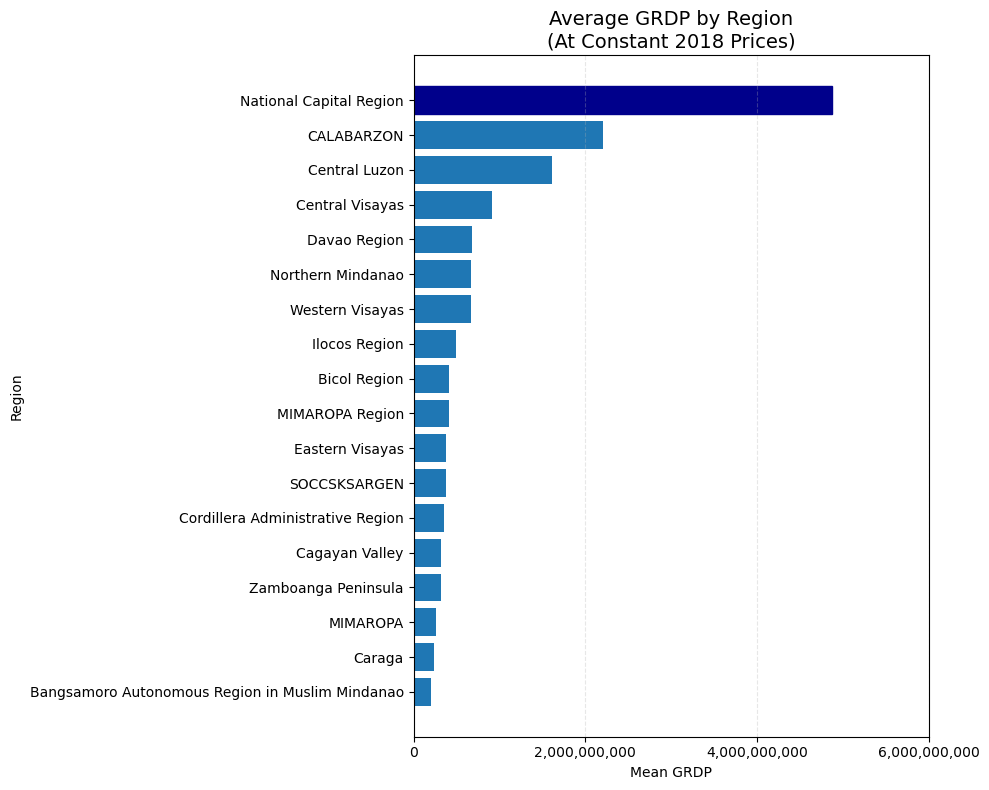

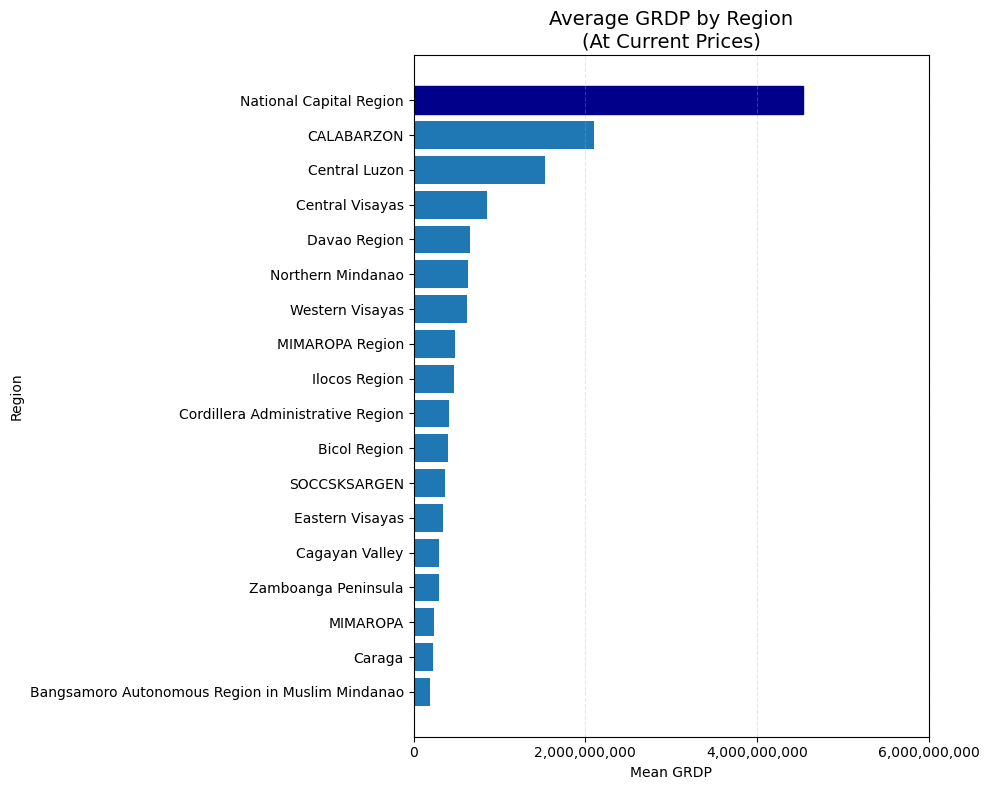

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def show_region_bar_chart(title, xlabel, df, grdp_col, xlim):
    plt.figure(figsize=(10, 8))
    bars = plt.barh(df["Region"], df[grdp_col])
    
    # Highlight top region
    bars[-1].set_color("darkblue")
    
    # Format numbers (no scientific notation)
    plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    # Define x axis intervals
    plt.xlim(0, xlim)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2e+9))
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Region")
    
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def get_mean_data(price_type):
    # Filter by price type
    mean_data = mean_df[mean_df["Price_Type"] == price_type].copy()
    
    # Ascending for horizontal bars
    mean_data = mean_data.sort_values("Mean", ascending=True)
    return mean_data

def show_avg_mean(price_type):
    # Show Mean GRDP by Region for a Given Price Type
    title = f"Average GRDP by Region\n({price_type})"
    mean_data = get_mean_data(price_type)
    show_region_bar_chart(title, "Mean GRDP", mean_data, "Mean", 6e+9)

show_avg_mean("At Constant 2018 Prices")
show_avg_mean("At Current Prices")

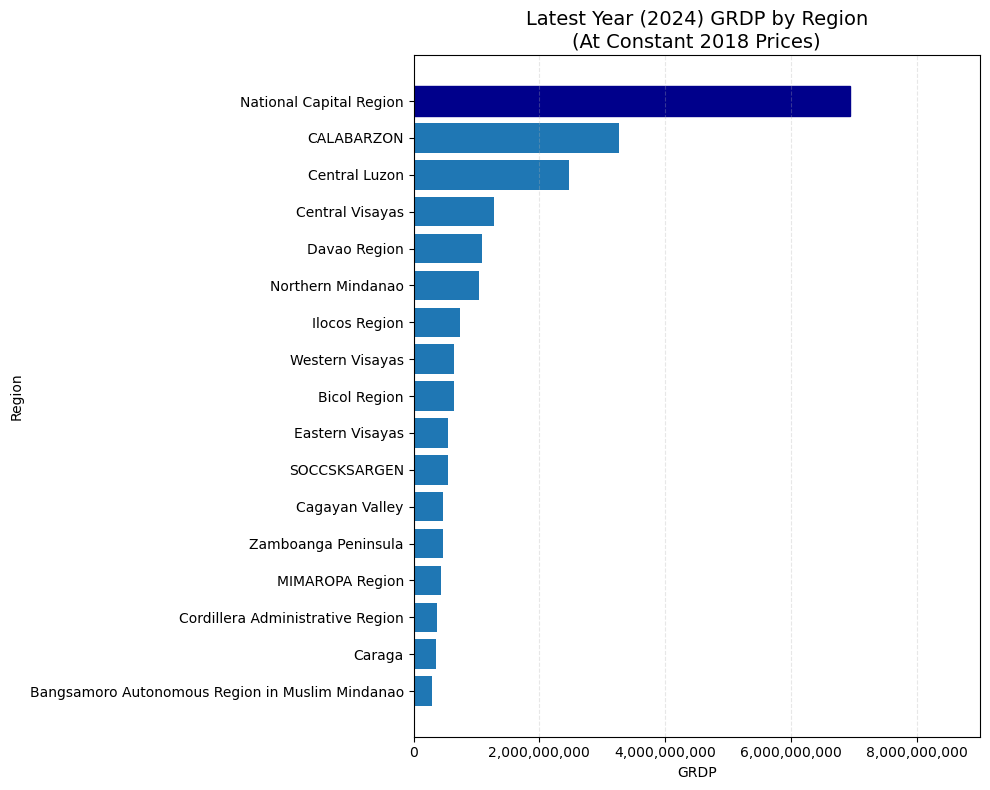

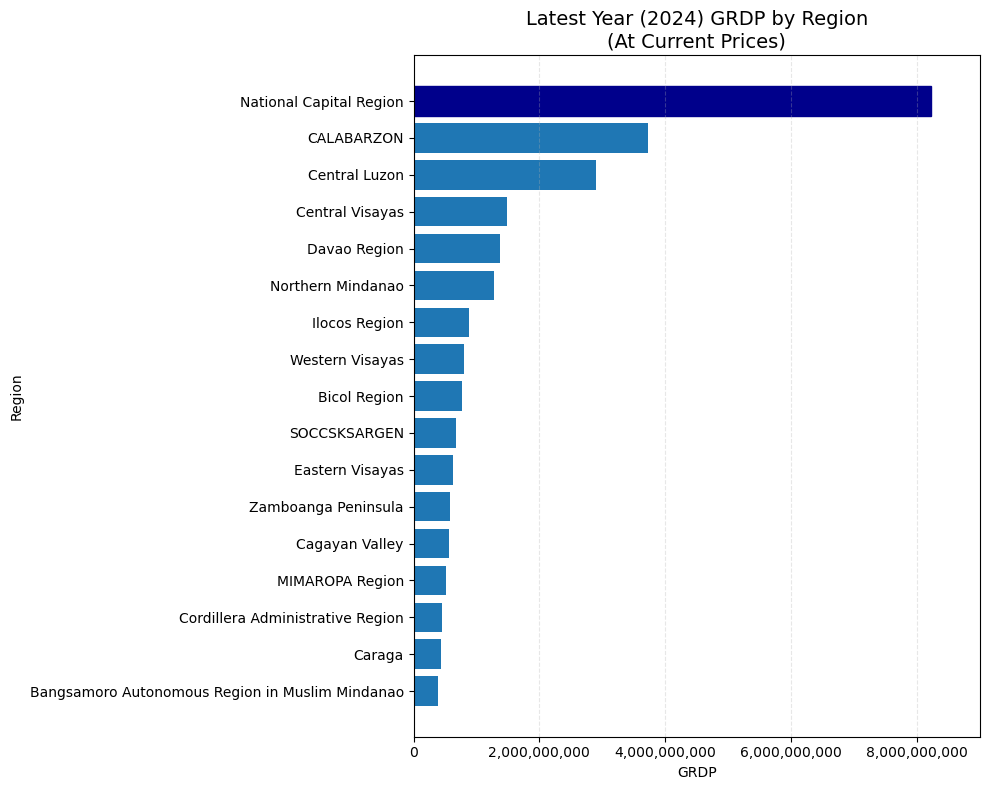

In [16]:
def get_latest_grdp(price_type):
  # Filter by price type
  latest_grdp = df[df['Year'] == 2024]
  latest_grdp = latest_grdp[latest_grdp["Price_Type"] == price_type]

  # Ascending for horizontal bars
  latest_grdp = latest_grdp.sort_values("Total_GRDP", ascending=True)
  return latest_grdp

def show_latest_grdp(price_type):
  # Show Latest GRDP by Region for a Given Price Type
  title = f"Latest Year (2024) GRDP by Region\n({price_type})"
  latest_grdp = get_latest_grdp(price_type)
  show_region_bar_chart(title, "GRDP", latest_grdp, "Total_GRDP", 9e+9)

show_latest_grdp("At Constant 2018 Prices")
show_latest_grdp("At Current Prices")

In [17]:
def get_ranking_table(df, price_type, grdp_col, grdp_label):
  table = df[['Region', 'Price_Type', grdp_col]]
  table = table[table['Price_Type'] == price_type]
  table.sort_values(grdp_col, ascending=False, inplace=True, ignore_index=True)
  table.rename(columns={grdp_col:f'{grdp_label} ({price_type})'}, inplace=True)
  table.drop(columns=['Price_Type'], inplace=True)
  table.reset_index()
  table.index = table.index + 1
  return table

# Regional GRDP ranking table (mean)
display(get_ranking_table(mean_df, 'At Constant 2018 Prices', 'Mean', 'Mean GRDP'))
display(get_ranking_table(mean_df, 'At Current Prices', 'Mean', 'Mean GRDP'))

,Region,Mean GRDP (At Constant 2018 Prices)
1,National Capital Region,4.868232e+09
2,CALABARZON,2.204374e+09
3,Central Luzon,1.614753e+09
4,Central Visayas,9.114054e+08
5,Davao Region,6.769329e+08
6,Northern Mindanao,6.702540e+08
7,Western Visayas,6.643274e+08
8,Ilocos Region,4.933484e+08
9,Bicol Region,4.176218e+08
10,MIMAROPA Region,4.111643e+08


,Region,Mean GRDP (At Current Prices)
1,National Capital Region,4.527995e+09
2,CALABARZON,2.106031e+09
3,Central Luzon,1.524743e+09
4,Central Visayas,8.555060e+08
5,Davao Region,6.583388e+08
6,Northern Mindanao,6.369247e+08
7,Western Visayas,6.278832e+08
8,MIMAROPA Region,4.778642e+08
9,Ilocos Region,4.666534e+08
10,Cordillera Administrative Region,4.072205e+08


In [18]:
# Regional GRDP ranking table (latest year)
latest_grdp = df[df['Year'] == 2024]
display(get_ranking_table(latest_grdp, 'At Constant 2018 Prices', 'Total_GRDP', '2024 GRDP'))
display(get_ranking_table(latest_grdp, 'At Current Prices', 'Total_GRDP', '2024 GRDP'))

,Region,2024 GRDP (At Constant 2018 Prices)
1,National Capital Region,6.941894e+09
2,CALABARZON,3.266385e+09
3,Central Luzon,2.467917e+09
4,Central Visayas,1.276348e+09
5,Davao Region,1.082492e+09
6,Northern Mindanao,1.043494e+09
7,Ilocos Region,7.356166e+08
8,Western Visayas,6.417637e+08
9,Bicol Region,6.400725e+08
10,Eastern Visayas,5.556245e+08


,Region,2024 GRDP (At Current Prices)
1,National Capital Region,8.214308e+09
2,CALABARZON,3.723569e+09
3,Central Luzon,2.892168e+09
4,Central Visayas,1.491366e+09
5,Davao Region,1.376651e+09
6,Northern Mindanao,1.273437e+09
7,Ilocos Region,8.773187e+08
8,Western Visayas,7.970408e+08
9,Bicol Region,7.699415e+08
10,SOCCSKSARGEN,6.756179e+08
